In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr
from math import sqrt


In [28]:
class my_regression:
    """ Class containing fit, predict and output methods for linear regression. 
    
    Input:
    model_object: sklearn model object
    data dictionary with the following keys
    x_train: 1D or 2D array
    x_test: 1D or 2D array
    y_train: 1D array
    y_test: 1D array 
    """
    
    def __init__(self, data, model_object):
        self.model_object = model_object
        self.xtrain = data['x_train']
        self.xtest = data['x_test']
        self.ytrain= data['y_train']
        self.ytest = data['y_test']
        self.model = None
        self.ypred = None
    
    def fit(self):
        from sklearn.linear_model import LinearRegression
        self.model = self.model_object.fit(self.xtrain, self.ytrain)
        return self.model
    
    def predict(self):
        if self.model is None:
            self.model = self.model_object.fit(self.xtrain, self.ytrain)
        self.ypred = self.model.predict(xtest)
        return self.ypred
    
    def model_outputs(self):
        if self.model is None:
            self.model = lr.fit(self.xtrain, self.ytrain)
        print(f'Intercept: {self.model.intercept_}\n')
        print(f'Coefficients: {self.model.coef_}\n')
        
class regression_metrics():
    """ Class containing accuracy and error prediction methods for regression models. 
    
    Input:
    model = fitted sklearn model
    data dictionary with the following keys
    x_train: 1D or 2D array
    x_test: 1D or 2D array
    y_train: 1D array
    y_test: 1D array 
    """
        
    def __init__(self, model, data):
        self.model = model
        self.xtrain = data['x_train']
        self.xtest = data['x_test']
        self.ytrain= data['y_train']
        self.ytest = data['y_test']
        
    def get_rsquared(self):
        r_squared = self.model.score(self.xtrain, self.ytrain)
        return round(r_squared,2)

    def get_mse(self):
        from sklearn import metrics
        ypred = self.model.predict(self.xtest)
        mse = metrics.mean_squared_error(self.ytest, ypred)
        return mse
    
    def get_rmse(self):
        mse = self.get_mse()
        rmse = sqrt(mse)
        return rmse
    
    def return_metrics(self):
        print("\nModel metrics:\n")
        print(f"R^2 (training data): {self.get_rsquared()}")
        print(f"MSE (test data): {round(self.get_mse(),2)}")
        print(f"RMSE (test data): {round(self.get_rmse(),2)}")
        
class regression_plots:
    """ Class containing diagnostic plots for regression models. 
    
    Input:
    model = fitted sklearn model
    data dictionary with the following keys
    x_train: 1D or 2D array
    x_test: 1D or 2D array
    y_train: 1D array
    y_test: 1D array 
    """
        
    def __init__(self, model, data):
        self.model = model
        self.xtrain = data['x_train']
        self.xtest = data['x_test']
        self.ytrain= data['y_train']
        self.ytest = data['y_test']
        self.ypred = None
        
    def predicted_vs_observed(self):
        self.ypred = self.model.predict(self.xtest)
        ax = sns.regplot(self.ypred, self.ytest);
        ax.set(xlabel = 'Predicted Values', ylabel = 'Observed Values')
        return ax
    def resid_vs_predicted(self):
        vals = {'Residuals': self.ytest - self.ypred, 'Predicted Values': self.ypred}
        resdf = pd.DataFrame(vals)
        ax = sns.residplot(y = 'Residuals',x = 'Predicted Values', data=resdf, lowess = True)
        return ax

#Do the regression using statsmodels to get outliers and influential values easily
def statsmodels_OLS_fit(xtrain, ytrain):
    import statsmodels.api as sm
    xtrain_plusconstant = sm.add_constant(xtrain)
    lr = sm.OLS(ytrain, xtrain_plusconstant)
    model = lr.fit()
    return model
    
class influential_values:
    """ Class containing methods for calculating influential values and outliers. 
    
    Input:
    model = fitted sklearn model
    """
        
    def __init__(model):
        self.model = model
    
    def leverage(self):
        influence = self.model.get_influence()
        return influence.hat_matrix_diag
    
    def cooksD(self):
        return self.model.get_influence().cooks_distance
    
    def standardised_resids(self):
        return self.model.get_influence().resid_studentized_internal
    
    def studentized_resids(self):
        return self.model.get_influence().resid_studentized_external
    
    def print_values(self):
        print("\nOutliers and Influential Values\n")
        print(f"Max leverage: {np.max(leverage())}")
        print(f"Max Cook's distance: {np.max(cooksD())}")
        print(f"Standardized residuals between {np.min(self.standardized_resids())} and {np.max(self.standardized_resids())}")
        print(f"Studentized residuals between {np.min(self.studentized_resids())} and {np.max(self.studentized_resids())}")
     

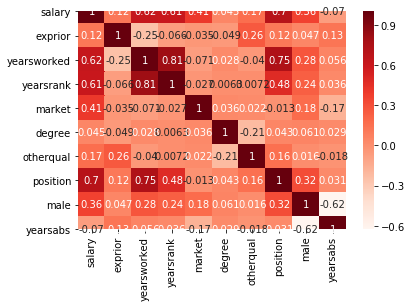

In [29]:
#import salary dataset, removing NAs
df = pd.read_csv("salary.csv")
df = df.dropna()

df.Field = df.Field.astype('category')

#create dummy variables of Field, the only categorical variable
pd.get_dummies(df, drop_first=True)

#visually show high correlation between yearsworked and yearsrank
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)

#select two feature sets
x1 = df.drop(columns=['salary'])
x2 = df.drop(columns=['salary', 'yearsrank'])

y = df['salary']

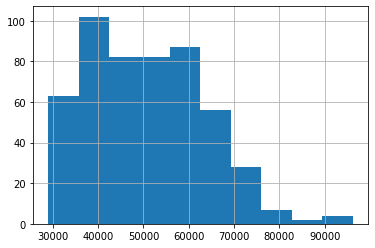

In [30]:
y.hist();

The distribution is skewed - log transform to correct.

mean : 0.0, st dev: 1.0


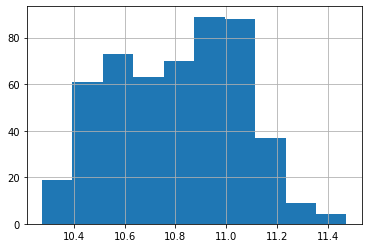

In [31]:
#Scale and transform variables
#standardise data so that mean=0 and SD=1    
standardizer = StandardScaler()   
x1_scaled = standardizer.fit_transform(x1)
x2_scaled = standardizer.fit_transform(x2)

#test that it worked
print(f"mean : {round(np.mean(x1_scaled), 2)}, st dev: {round(np.std(x1_scaled),2)}")

y_log = y.apply(np.log)
y_log.hist();

In [9]:
#do test-train split
x1train, x1test, ytrain, ytest = train_test_split(
    x1_scaled, y_log, test_size = 0.2, random_state = 2)

data = {"x_train": x1train, "x_test": x1test, "y_train": ytrain, "y_test": ytest}

#check that it worked
print("Train and test data shapes:")
for key, value in data.items():
    print(value.shape)
    

Train and test data shapes:
(410, 10)
(103, 10)
(410,)
(103,)


In [32]:
#build model
lr_model1 = my_regression(data, LinearRegression())
model1 = lr_model1.fit()
lr_model1.model_outputs()

Intercept: 10.808696238883723

Coefficients: [ 0.014508   -0.00711911  0.08092304  0.10081632  0.00092358  0.00741048
  0.13201848  0.00897059 -0.0413046   0.00342296]



In [33]:
metrics_m1 =  regression_metrics(model1, data)
r_squared = metrics_m1.get_rsquared()
mse = metrics_m1.get_mse()
rmse = metrics_m1.get_rmse()
metrics_m1.return_metrics()


Model metrics:

R^2 (training data): 0.83
MSE (test data): 0.01
RMSE (test data): 0.11


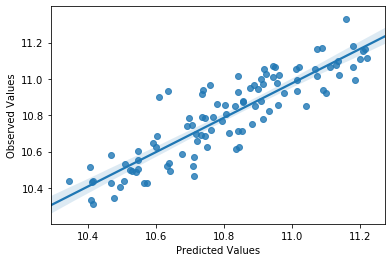

In [34]:
# Check model diagnostics
plots_m1 = regression_plots(model1, data)
plots_m1.predicted_vs_observed();

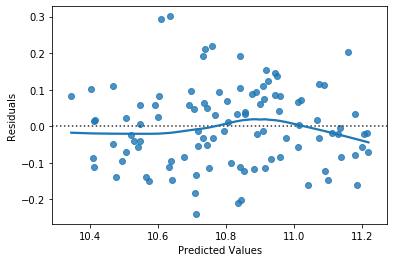

In [35]:
plots_m1.resid_vs_predicted();

## Model 2: No `yearsrank`
Do the same thing for the second model, leaving out years worked in current rank as a predictor

In [36]:
#data preparation
x2train, x2test, ytrain, ytest = train_test_split(x2_scaled, y_log, test_size = 0.2, random_state = 2)

data2 = {"x_train": x1train, "x_test": x1test, "y_train": ytrain, "y_test": ytest}

#check that it worked
print("Train and test data shapes:")
for key, value in data2.items():
    print(value.shape)
    

Train and test data shapes:
(410, 10)
(103, 10)
(410,)
(103,)


In [37]:
#build model
lr_model2 = my_regression(data2, LinearRegression())
model2 = lr_model2.fit()
lr_model2.model_outputs()

Intercept: 10.808696238883723

Coefficients: [ 0.014508   -0.00711911  0.08092304  0.10081632  0.00092358  0.00741048
  0.13201848  0.00897059 -0.0413046   0.00342296]



In [38]:
metrics_m2 =  regression_metrics(model2, data2)
metrics_m2.return_metrics()


Model metrics:

R^2 (training data): 0.83
MSE (test data): 0.01
RMSE (test data): 0.11


The model performs similarly on the test data - the RMSE and MSE values are only sligthly higher (indicating slightly more error) and the variance explained is similar. There is no need to use `yearsrank` as a feature.Let's look at model diagnostics.

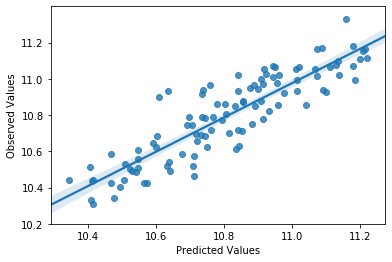

In [39]:
plots_m2 = regression_plots(model2, data2)
plots_m2.predicted_vs_observed();

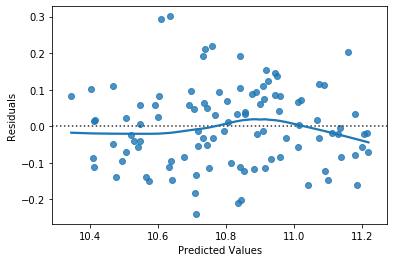

In [40]:
plots_m2.resid_vs_predicted();

The residuals are still non-linear: we can try to make this model better. However, there doesn't seem to be a big difference between the model with and without `yearsrank` - we can leave it out.

## BONUS: Influential values

In [21]:
statsmodel = statsmodels_OLS_fit(x1train, ytrain)

#this works
influence = statsmodel.get_influence()
leverage = influence.hat_matrix_diag

#this doesn't
# influential_values.leverage(statsmodel)